In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

In [2]:
#load data
survey_df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')
survey_df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [3]:
#get data types
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8586 non-null float64
ppltrst    8580 non-null float64
pplfair    8555 non-null float64
pplhlp     8569 non-null float64
happy      8563 non-null float64
sclmeet    8579 non-null float64
sclact     8500 non-null float64
gndr       8584 non-null float64
agea       8355 non-null float64
partner    8577 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 873.0+ KB


In [4]:
#check for missing data
survey_df.isnull().sum()*100/survey_df.isnull().count()

cntry      0.000000
idno       0.000000
year       0.000000
tvtot      0.093088
ppltrst    0.162904
pplfair    0.453805
pplhlp     0.290901
happy      0.360717
sclmeet    0.174540
sclact     1.093786
gndr       0.116360
agea       2.781010
partner    0.197812
dtype: float64

I will replace the missing values with the mean for each variable.

In [5]:
#replace missing values with column means
fill = ['tvtot', 'ppltrst', 'pplfair', 'pplhlp', 'happy', 'sclmeet', 'sclact', 'gndr', 'agea', 'partner']
for col in fill:
    survey_df.loc[:, col].fillna(survey_df.loc[:, col].mean(), inplace=True)

# 1

Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [6]:
#select data for Switzerland
survey_df_CH = survey_df[survey_df['cntry'] == 'CH']
survey_df_CH_12 = survey_df_CH[survey_df_CH['year'] == 6]
survey_df_CH_14 = survey_df_CH[survey_df_CH['year'] == 7]

2012 mean:  5.677878395860285
2014 mean:  5.751617076326003


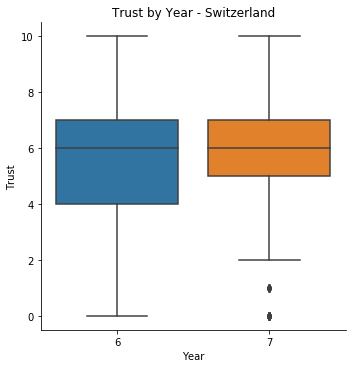

In [7]:
#Switzerland means and boxplot by year
print('2012 mean: ', survey_df_CH_12['ppltrst'].mean())
print('2014 mean: ', survey_df_CH_14['ppltrst'].mean())

sns.catplot(x='year', y= 'ppltrst', kind='box', data= survey_df_CH)
plt.xlabel('Year')
plt.ylabel('Trust')
plt.title('Trust by Year - Switzerland')
plt.show()

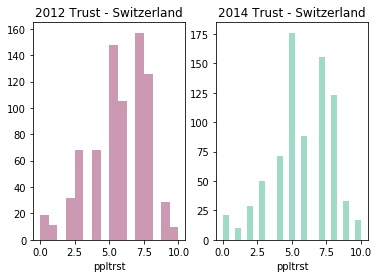

In [8]:
#distribution of trust by year
plt.subplot(1, 2, 1)
sns.distplot(survey_df_CH_12['ppltrst'], kde = False, color = '#80013f')
plt.title('2012 Trust - Switzerland')
plt.subplot(1, 2, 2)
sns.distplot(survey_df_CH_14['ppltrst'], kde = False, color = '#10a674')
plt.title('2014 Trust - Switzerland')
plt.show()

Since this data is from two different years in the same country, we will assume that the survey went to the same people for both years of the survey, and therefore that the two groups are dependent. The distributions are similar to a normal distribution with most of the data concentrated towards the center. Thus, we will use a t-test for paired samples.

In [9]:
stats.ttest_rel(survey_df_CH_12['ppltrst'], survey_df_CH_14['ppltrst'])

Ttest_relResult(statistic=-0.6586851756725737, pvalue=0.5102943511301135)

There was no significant difference in how trusting people were in Switzerland between 2012 and 2014.

In [10]:
#select data for Czech Republic
survey_df_CZ = survey_df[survey_df['cntry'] == 'CZ']
survey_df_CZ_12 = survey_df_CZ[survey_df_CZ['year'] == 6]
survey_df_CZ_14 = survey_df_CZ[survey_df_CZ['year'] == 7]

4.3752573667467285
4.426382837021135


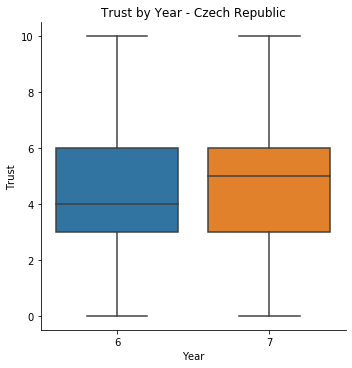

In [11]:
#means and boxplot by year
print(survey_df_CZ_12['ppltrst'].mean())
print(survey_df_CZ_14['ppltrst'].mean())

sns.catplot(x='year', y= 'ppltrst', kind='box', data= survey_df_CZ)
plt.xlabel('Year')
plt.ylabel('Trust')
plt.title('Trust by Year - Czech Republic')
plt.show()

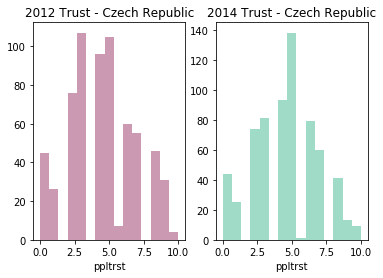

In [12]:
#histograms of trust by year
plt.subplot(1, 2, 1)
sns.distplot(survey_df_CZ_12['ppltrst'], kde = False, color = '#80013f')
plt.title('2012 Trust - Czech Republic')
plt.subplot(1, 2, 2)
sns.distplot(survey_df_CZ_14['ppltrst'], kde = False, color = '#10a674')
plt.title('2014 Trust - Czech Republic')
plt.show()

In [13]:
stats.ttest_rel(survey_df_CZ_12['ppltrst'], survey_df_CZ_14['ppltrst'])

Ttest_relResult(statistic=-0.3806726938653253, pvalue=0.7035691821557306)

There was no significant difference in how trusting people in the Czech Republic were between 2012 and 2014.

In [14]:
#select data for Germany
survey_df_DE = survey_df[survey_df['cntry'] == 'DE']
survey_df_DE_12 = survey_df_DE[survey_df_DE['year'] == 6]
survey_df_DE_14 = survey_df_DE[survey_df_DE['year'] == 7]

5.214285714285714
5.357142857142857


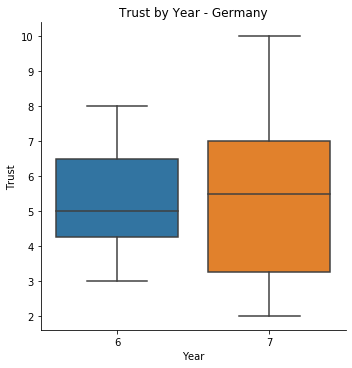

In [15]:
#means and boxplot by year
print(survey_df_DE_12['ppltrst'].mean())
print(survey_df_DE_14['ppltrst'].mean())

sns.catplot(x='year', y= 'ppltrst', kind='box', data= survey_df_DE)
plt.xlabel('Year')
plt.ylabel('Trust')
plt.title('Trust by Year - Germany')
plt.show()

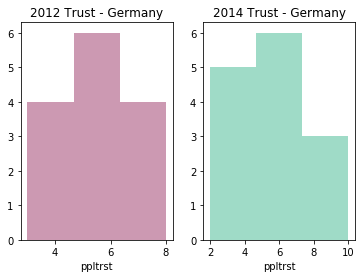

In [16]:
#histograms of trust by year
plt.subplot(1, 2, 1)
sns.distplot(survey_df_DE_12['ppltrst'], kde = False, color = '#80013f')
plt.title('2012 Trust - Germany')
plt.subplot(1, 2, 2)
sns.distplot(survey_df_DE_14['ppltrst'], kde = False, color = '#10a674')
plt.title('2014 Trust - Germany')
plt.show()

In [17]:
stats.ttest_rel(survey_df_DE_12['ppltrst'], survey_df_DE_14['ppltrst'])

Ttest_relResult(statistic=-0.18399501804849683, pvalue=0.8568563797095805)

There was no significant difference in how trusting people were in Germany between 2012 and 2014.

In [18]:
#select data for Spain
survey_df_ES = survey_df[survey_df['cntry'] == 'ES']
survey_df_ES_12 = survey_df_ES[survey_df_ES['year'] == 6]
survey_df_ES_14 = survey_df_ES[survey_df_ES['year'] == 7]

5.114591920857379
4.896224083693169


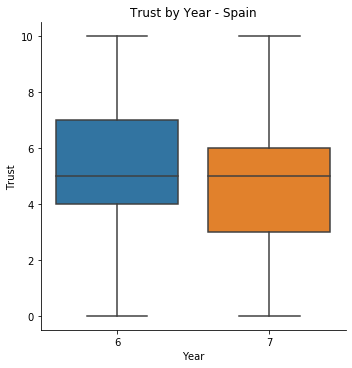

In [19]:
#means and boxplot by year
print(survey_df_ES_12['ppltrst'].mean())
print(survey_df_ES_14['ppltrst'].mean())

sns.catplot(x='year', y= 'ppltrst', kind='box', data= survey_df_ES)
plt.xlabel('Year')
plt.ylabel('Trust')
plt.title('Trust by Year - Spain')
plt.show()

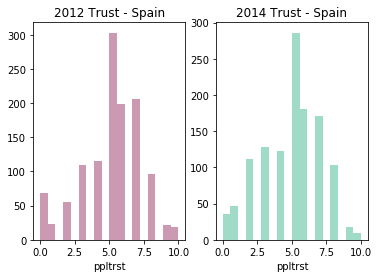

In [20]:
#histograms of trust by year
plt.subplot(1, 2, 1)
sns.distplot(survey_df_ES_12['ppltrst'], kde = False, color = '#80013f')
plt.title('2012 Trust - Spain')
plt.subplot(1, 2, 2)
sns.distplot(survey_df_ES_14['ppltrst'], kde = False, color = '#10a674')
plt.title('2014 Trust - Spain')
plt.show()

In [21]:
stats.ttest_rel(survey_df_ES_12['ppltrst'], survey_df_ES_14['ppltrst'])

Ttest_relResult(statistic=2.4735850532737875, pvalue=0.013512727333085083)

People in Spain became less trusting between 2012 and 2014.

In [22]:
#select data for Norway
survey_df_NO = survey_df[survey_df['cntry'] == 'NO']
survey_df_NO_12 = survey_df_NO[survey_df_NO['year'] == 6]
survey_df_NO_14 = survey_df_NO[survey_df_NO['year'] == 7]

6.647824769849394
6.597209174774155


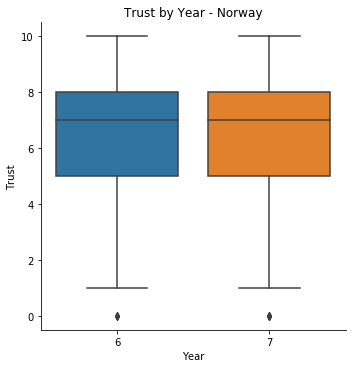

In [23]:
#means and boxplot by year
print(survey_df_NO_12['ppltrst'].mean())
print(survey_df_NO_14['ppltrst'].mean())

sns.catplot(x='year', y= 'ppltrst', kind='box', data= survey_df_NO)
plt.xlabel('Year')
plt.ylabel('Trust')
plt.title('Trust by Year - Norway')
plt.show()

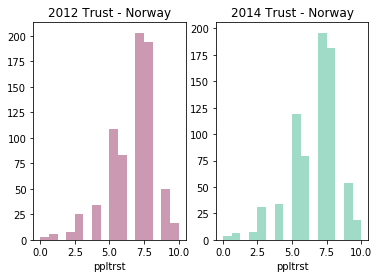

In [24]:
#histograms of trust by year
plt.subplot(1, 2, 1)
sns.distplot(survey_df_NO_12['ppltrst'], kde = False, color = '#80013f')
plt.title('2012 Trust - Norway')
plt.subplot(1, 2, 2)
sns.distplot(survey_df_NO_14['ppltrst'], kde = False, color = '#10a674')
plt.title('2014 Trust - Norway')
plt.show()

In [25]:
stats.ttest_rel(survey_df_NO_12['ppltrst'], survey_df_NO_14['ppltrst'])

Ttest_relResult(statistic=0.5359620844852665, pvalue=0.5921480165258421)

There was no significant difference in how trusting people in Norway were from 2012 to 2014.

In [26]:
#select data for Sweden
survey_df_SE = survey_df[survey_df['cntry'] == 'SE']
survey_df_SE_12 = survey_df_SE[survey_df_SE['year'] == 6]
survey_df_SE_14 = survey_df_SE[survey_df_SE['year'] == 7]

6.057400675682614
6.257709251101321


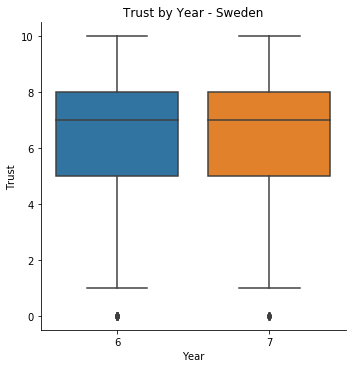

In [27]:
#means and boxplot by year
print(survey_df_SE_12['ppltrst'].mean())
print(survey_df_SE_14['ppltrst'].mean())

sns.catplot(x='year', y= 'ppltrst', kind='box', data= survey_df_SE)
plt.xlabel('Year')
plt.ylabel('Trust')
plt.title('Trust by Year - Sweden')
plt.show()

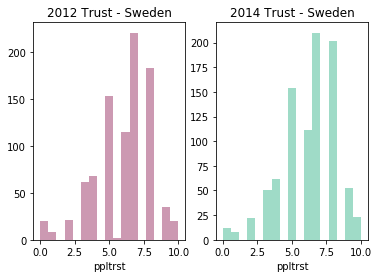

In [28]:
#histograms of trust by year
plt.subplot(1, 2, 1)
sns.distplot(survey_df_SE_12['ppltrst'], kde = False, color = '#80013f')
plt.title('2012 Trust - Sweden')
plt.subplot(1, 2, 2)
sns.distplot(survey_df_SE_14['ppltrst'], kde = False, color = '#10a674')
plt.title('2014 Trust - Sweden')
plt.show()

In [29]:
stats.ttest_rel(survey_df_SE_12['ppltrst'], survey_df_SE_14['ppltrst'])

Ttest_relResult(statistic=-2.0879313873469765, pvalue=0.037082509549775954)

People became slightly more trusting in Sweden between 2012 and 2014.

Overall, there was not a significant change in how trusting people were between 2012 and 2014, but people became slightly more trusting in Spain and slightly less trusting in Sweden.

## 2

Did people become happier from 2012 to 2014? Compute results for each country in the sample.

2012 mean:  8.086783763413065
2014 mean:  8.116429495472186


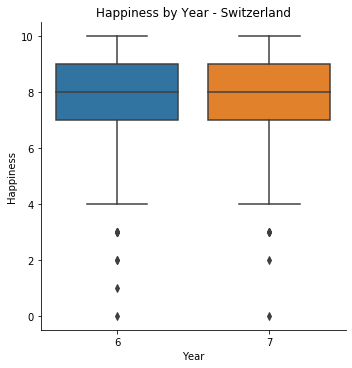

In [30]:
#Switzerland means and boxplot by year
print('2012 mean: ', survey_df_CH_12['happy'].mean())
print('2014 mean: ', survey_df_CH_14['happy'].mean())

sns.catplot(x='year', y= 'happy', kind='box', data= survey_df_CH)
plt.xlabel('Year')
plt.ylabel('Happiness')
plt.title('Happiness by Year - Switzerland')
plt.show()

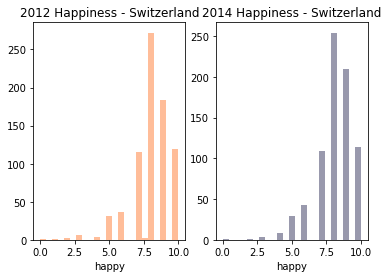

In [31]:
#distribution of happiness by year
plt.subplot(1, 2, 1)
sns.distplot(survey_df_CH_12['happy'], kde = False, color = '#ff5b00')
plt.title('2012 Happiness - Switzerland')
plt.subplot(1, 2, 2)
sns.distplot(survey_df_CH_14['happy'], kde = False, color = '#000133')
plt.title('2014 Happiness - Switzerland')
plt.show()

Based on the assumption that the same people were surveyed each year, we have two dependent groups. This variable is not normally distributed, so we will use a Wilcoxon signed-rank test.

In [32]:
stats.wilcoxon(survey_df_CH_12['happy'], survey_df_CH_14['happy'])

WilcoxonResult(statistic=93199.5, pvalue=0.8908303608327776)

There was not a significant difference in happiness in Switzerland between 2012 and 2014.

2012 mean:  6.78774376363708
2014 mean:  6.921227504918844


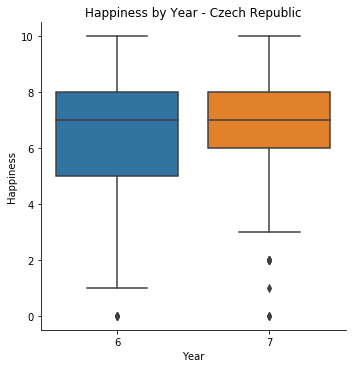

In [33]:
#means and boxplot by year
print('2012 mean: ', survey_df_CZ_12['happy'].mean())
print('2014 mean: ', survey_df_CZ_14['happy'].mean())

sns.catplot(x='year', y= 'happy', kind='box', data= survey_df_CZ)
plt.xlabel('Year')
plt.ylabel('Happiness')
plt.title('Happiness by Year - Czech Republic')
plt.show()

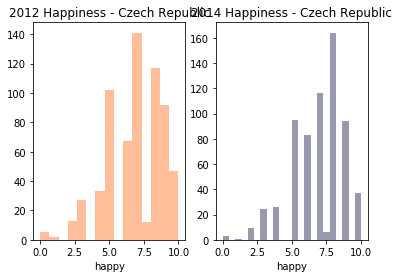

In [34]:
#distribution of happiness by year
plt.subplot(1, 2, 1)
sns.distplot(survey_df_CZ_12['happy'], kde = False, color = '#ff5b00')
plt.title('2012 Happiness - Czech Republic')
plt.subplot(1, 2, 2)
sns.distplot(survey_df_CZ_14['happy'], kde = False, color = '#000133')
plt.title('2014 Happiness - Czech Republic')
plt.show()

In [35]:
stats.wilcoxon(survey_df_CZ_12['happy'], survey_df_CZ_14['happy'])

WilcoxonResult(statistic=79039.0, pvalue=0.2756811173565926)

There was no significant difference in happiness in the Czech Republic from 2012 to 2014.

2012 mean:  7.428571428571429
2014 mean:  7.857142857142857


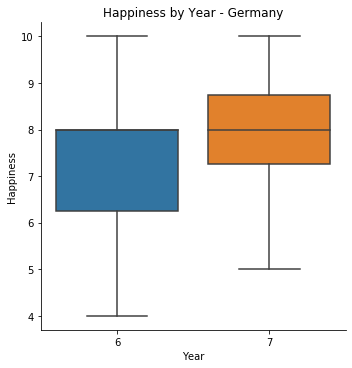

In [36]:
#means and boxplot by year
print('2012 mean: ', survey_df_DE_12['happy'].mean())
print('2014 mean: ', survey_df_DE_14['happy'].mean())

sns.catplot(x='year', y= 'happy', kind='box', data= survey_df_DE)
plt.xlabel('Year')
plt.ylabel('Happiness')
plt.title('Happiness by Year - Germany')
plt.show()

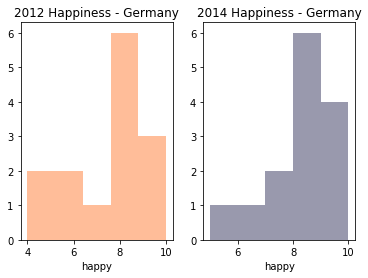

In [37]:
#distribution of happiness by year
plt.subplot(1, 2, 1)
sns.distplot(survey_df_DE_12['happy'], kde = False, color = '#ff5b00')
plt.title('2012 Happiness - Germany')
plt.subplot(1, 2, 2)
sns.distplot(survey_df_DE_14['happy'], kde = False, color = '#000133')
plt.title('2014 Happiness - Germany')
plt.show()

In [38]:
stats.wilcoxon(survey_df_DE_12['happy'], survey_df_DE_14['happy'])

WilcoxonResult(statistic=23.5, pvalue=0.393351316918508)

There was no significant change in happiness in Germany between 2012 and 2014.

2012 mean:  7.548800178378208
2014 mean:  7.42019341827928


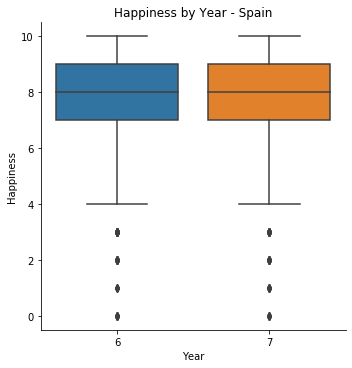

In [39]:
#means and boxplot by year
print('2012 mean: ', survey_df_ES_12['happy'].mean())
print('2014 mean: ', survey_df_ES_14['happy'].mean())

sns.catplot(x='year', y= 'happy', kind='box', data= survey_df_ES)
plt.xlabel('Year')
plt.ylabel('Happiness')
plt.title('Happiness by Year - Spain')
plt.show()

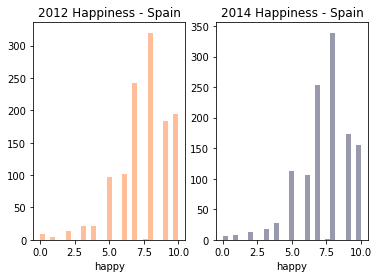

In [40]:
#distribution of happiness by year
plt.subplot(1, 2, 1)
sns.distplot(survey_df_ES_12['happy'], kde = False, color = '#ff5b00')
plt.title('2012 Happiness - Spain')
plt.subplot(1, 2, 2)
sns.distplot(survey_df_ES_14['happy'], kde = False, color = '#000133')
plt.title('2014 Happiness - Spain')
plt.show()

In [41]:
stats.wilcoxon(survey_df_ES_12['happy'], survey_df_ES_14['happy'])

WilcoxonResult(statistic=232720.5, pvalue=0.05979608639061816)

There was no significant difference in happiness in Spain from 2012 to 2014.

2012 mean:  8.248670951424167
2014 mean:  7.9151846785225715


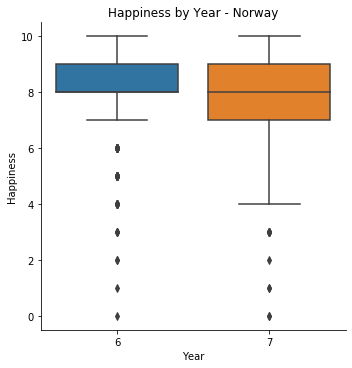

In [42]:
#means and boxplot by year
print('2012 mean: ', survey_df_NO_12['happy'].mean())
print('2014 mean: ', survey_df_NO_14['happy'].mean())

sns.catplot(x='year', y= 'happy', kind='box', data= survey_df_NO)
plt.xlabel('Year')
plt.ylabel('Happiness')
plt.title('Happiness by Year - Norway')
plt.show()

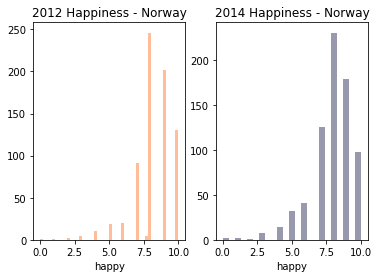

In [43]:
#distribution of happiness by year
plt.subplot(1, 2, 1)
sns.distplot(survey_df_NO_12['happy'], kde = False, color = '#ff5b00')
plt.title('2012 Happiness - Norway')
plt.subplot(1, 2, 2)
sns.distplot(survey_df_NO_14['happy'], kde = False, color = '#000133')
plt.title('2014 Happiness - Norway')
plt.show()

In [44]:
stats.wilcoxon(survey_df_NO_12['happy'], survey_df_NO_14['happy'])

WilcoxonResult(statistic=68932.5, pvalue=1.3328464907648905e-05)

People became less happy in Norway from 2012 to 2014.

2012 mean:  7.907152661203487
2014 mean:  7.946127587134691


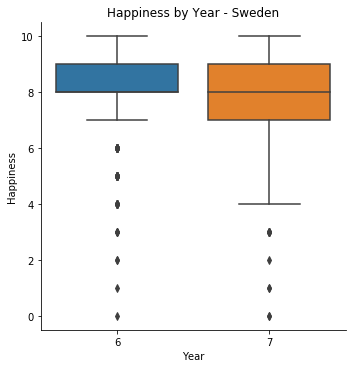

In [45]:
#means and boxplot by year
print('2012 mean: ', survey_df_SE_12['happy'].mean())
print('2014 mean: ', survey_df_SE_14['happy'].mean())

sns.catplot(x='year', y= 'happy', kind='box', data= survey_df_NO)
plt.xlabel('Year')
plt.ylabel('Happiness')
plt.title('Happiness by Year - Sweden')
plt.show()

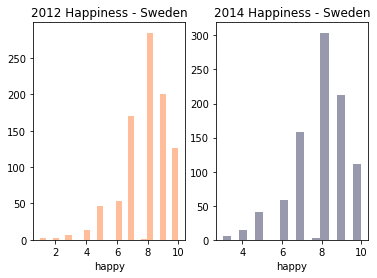

In [46]:
#distribution of happiness by year
plt.subplot(1, 2, 1)
sns.distplot(survey_df_SE_12['happy'], kde = False, color = '#ff5b00')
plt.title('2012 Happiness - Sweden')
plt.subplot(1, 2, 2)
sns.distplot(survey_df_SE_14['happy'], kde = False, color = '#000133')
plt.title('2014 Happiness - Sweden')
plt.show()

In [47]:
stats.wilcoxon(survey_df_SE_12['happy'], survey_df_SE_14['happy'])

WilcoxonResult(statistic=126893.0, pvalue=0.6924584472351083)

There was no significant difference in happiness in Sweden from 2012 to 2014.

Overall, there was not a significant difference in happiness from 2012 to 2014 in 5 out of the 6 countries. The only country that saw a change in happiness was Norway, where happiness decreased.

# 3

Who reported watching more TV in 2012, men or women?

Female mean:  3.944277159999256
Male mean:  3.901850489265741


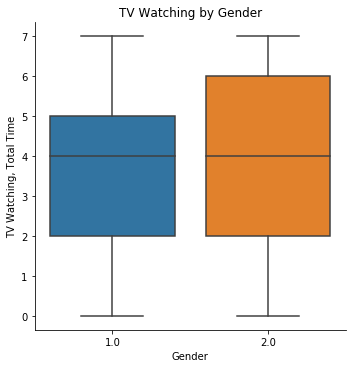

In [48]:
#select 2012 data
survey_df_12 = survey_df[survey_df['year'] == 6]
survey_df_12_f = survey_df_12[survey_df_12['gndr'] == 2.0]
survey_df_12_m = survey_df_12[survey_df_12['gndr'] == 1.0]

#get mean for each group
print('Female mean: ', survey_df_12_f['tvtot'].mean())
print('Male mean: ', survey_df_12_m['tvtot'].mean())

sns.catplot(x='gndr', y= 'tvtot', kind='box', data= survey_df_12)
plt.xlabel('Gender')
plt.ylabel('TV Watching, Total Time')
plt.title('TV Watching by Gender')
plt.show()

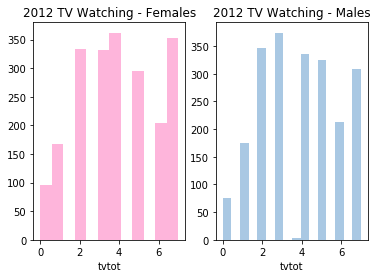

In [49]:
#distribution of happiness by year
plt.subplot(1, 2, 1)
sns.distplot(survey_df_12_f['tvtot'], kde = False, color = '#fe46a5')
plt.title('2012 TV Watching - Females')
plt.subplot(1, 2, 2)
sns.distplot(survey_df_12_m['tvtot'], kde = False, color = '#2976bb')
plt.title('2012 TV Watching - Males')
plt.show()

These are two independent groups, but the variables are not normally distributed. Therefore, I will use the Mann-Whitney U test to determine whether there is a significant difference between the two groups.

In [50]:
stats.mannwhitneyu(survey_df_12_f['tvtot'], survey_df_12_m['tvtot'])

MannwhitneyuResult(statistic=2277416.0, pvalue=0.22352009375447118)

The p-value of this test was greater than 0.05, which indicates that it is unlikely that there is a significant difference between the amount of time spent watching tv by men and women in 2012.

# 4

Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

Partner mean:  6.080425046784697
No partner mean:  5.857698728668892


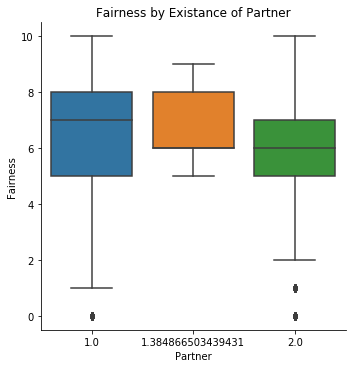

In [51]:
#get data for each group
survey_df_12_part = survey_df_12[survey_df_12['partner'] == 1.0]
survey_df_12_no_part = survey_df_12[survey_df_12['partner'] == 2.0]

#print mean for each group
print('Partner mean: ', survey_df_12_part['pplfair'].mean())
print('No partner mean: ', survey_df_12_no_part['pplfair'].mean())

#print boxplot by group
sns.catplot(x='partner', y= 'pplfair', kind='box', data= survey_df_12)
plt.xlabel('Partner')
plt.ylabel('Fairness')
plt.title('Fairness by Existance of Partner')
plt.show()

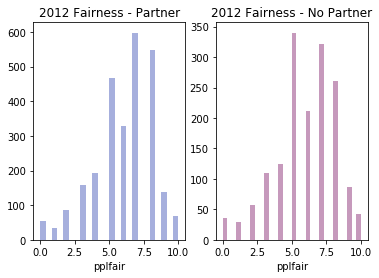

In [52]:
#distribution of fairness by presence of a partner
plt.subplot(1, 2, 1)
sns.distplot(survey_df_12_part['pplfair'], kde = False, color = '#2138ab')
plt.title('2012 Fairness - Partner')
plt.subplot(1, 2, 2)
sns.distplot(survey_df_12_no_part['pplfair'], kde = False, color = '#720058')
plt.title('2012 Fairness - No Partner')
plt.show()

These are two independent groups, since a person cannot both have a partner and not have a partner at the same time. This variable is fairly close to a normal distribution, with most of the data located towards the mean, and less of the data located towards the ends. Therefore, we will use the t-test for independent samples to compare the two groups.

In [53]:
stats.ttest_ind(survey_df_12_part['pplfair'], survey_df_12_no_part['pplfair'])

Ttest_indResult(statistic=3.3196342169381756, pvalue=0.0009088839089194009)

The p-value for this test is less than 0.05, which indicates that there is a significant difference between the means of the two groups. People who lived with a partner were more likely to think people were fair than people who did not live with a partner.

# 5

Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [54]:
#select data for 2014 for Switzerland, Czech Republic, Germany, and Sweden
survey_df_14 = survey_df[survey_df['year'] == 7]
survey_df_14_CH = survey_df_14[survey_df_14['cntry'] == 'CH']
survey_df_14_CZ = survey_df_14[survey_df_14['cntry'] == 'CZ']
survey_df_14_DE = survey_df_14[survey_df_14['cntry'] == 'DE']
survey_df_14_SE = survey_df_14[survey_df_14['cntry'] == 'SE']

Switzerland mean:  5.160663083099364
Czech Republic mean:  4.449206215360829
Germany mean:  4.428571428571429
Sweden mean:  5.426211453744493


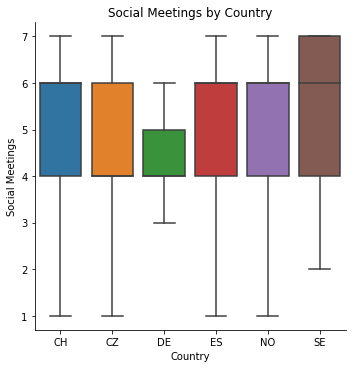

In [55]:
print('Switzerland mean: ', survey_df_14_CH['sclmeet'].mean())
print('Czech Republic mean: ', survey_df_14_CZ['sclmeet'].mean())
print('Germany mean: ', survey_df_14_DE['sclmeet'].mean())
print('Sweden mean: ', survey_df_14_SE['sclmeet'].mean())

sns.catplot(x='cntry', y= 'sclmeet', kind='box', data= survey_df_14)
plt.xlabel('Country')
plt.ylabel('Social Meetings')
plt.title('Social Meetings by Country')
plt.show()

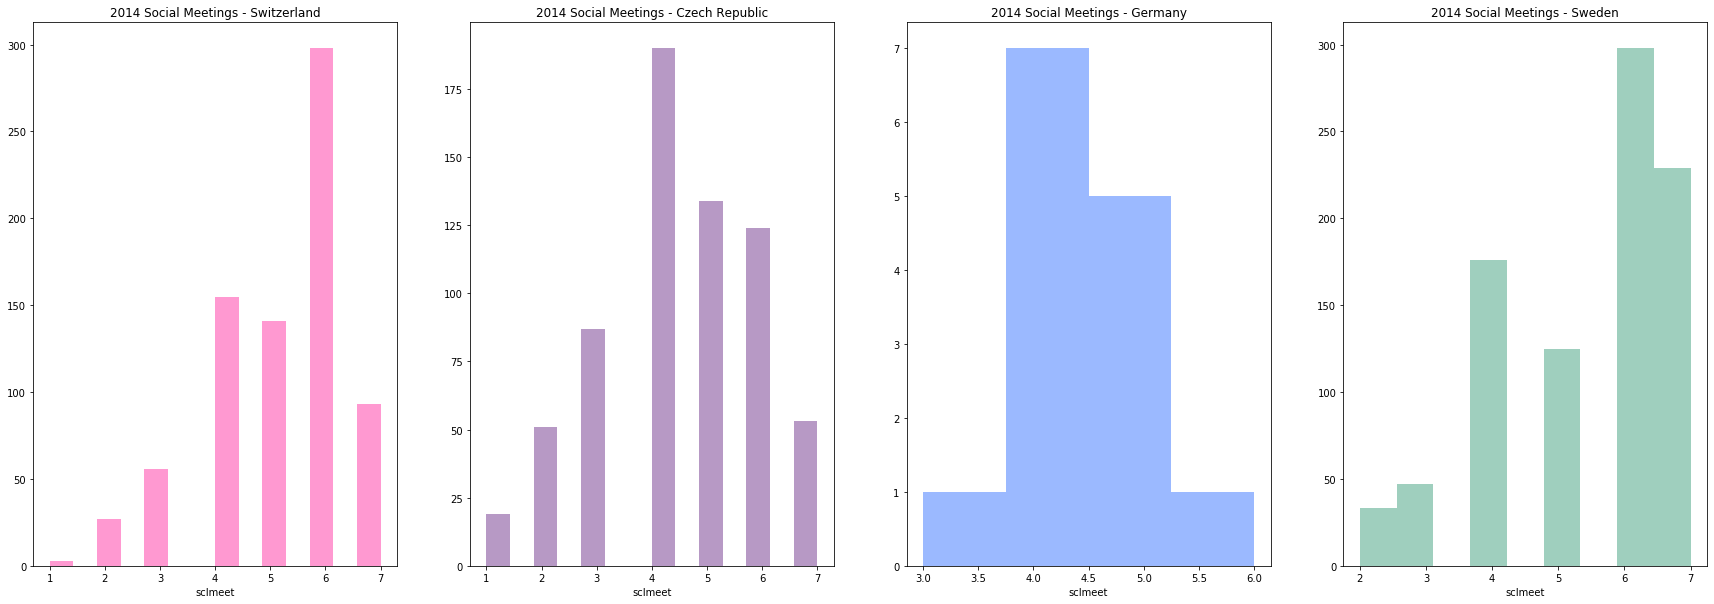

In [56]:
#distribution of happiness by year
plt.figure(figsize=(30,10))
plt.subplot(1, 4, 1)
sns.distplot(survey_df_14_CH['sclmeet'], kde = False, color = '#ff028d')
plt.title('2014 Social Meetings - Switzerland')
plt.subplot(1, 4, 2)
sns.distplot(survey_df_14_CZ['sclmeet'], kde = False, color = '#4b006e')
plt.title('2014 Social Meetings - Czech Republic')
plt.subplot(1, 4, 3)
sns.distplot(survey_df_14_DE['sclmeet'], kde = False, color = '#0652ff')
plt.title('2014 Social Meetings - Germany')
plt.subplot(1, 4, 4)
sns.distplot(survey_df_14_SE['sclmeet'], kde = False, color = '#11875d')
plt.title('2014 Social Meetings - Sweden')
plt.show()

These groups are all independent, since a person can only live in one country at a time. This variable is not normally distributed. Since we have four groups, we will use Mood's median test to compare all of the groups and then use a Mann-Whitney U Test to compare each of the groups with each of the other groups. 

In [57]:
stats.median_test(survey_df_14_CH['sclmeet'], survey_df_14_CZ['sclmeet'], survey_df_14_DE['sclmeet'], 
                  survey_df_14_SE['sclmeet'])

(159.60474335042397, 2.230638721231956e-34, 5.0, array([[392, 180,   1, 527],
        [381, 478,  13, 381]], dtype=int64))

In [58]:
print(stats.mannwhitneyu(survey_df_14_CH['sclmeet'], survey_df_14_CZ['sclmeet']))
print(stats.mannwhitneyu(survey_df_14_CH['sclmeet'], survey_df_14_DE['sclmeet']))
print(stats.mannwhitneyu(survey_df_14_CH['sclmeet'], survey_df_14_SE['sclmeet']))

MannwhitneyuResult(statistic=183215.0, pvalue=4.106365100981541e-21)
MannwhitneyuResult(statistic=3288.5, pvalue=0.004489249187130013)
MannwhitneyuResult(statistic=306356.0, pvalue=1.7019991826412022e-06)


In [59]:
print(stats.mannwhitneyu(survey_df_14_CZ['sclmeet'], survey_df_14_DE['sclmeet']))
print(stats.mannwhitneyu(survey_df_14_CZ['sclmeet'], survey_df_14_SE['sclmeet']))

MannwhitneyuResult(statistic=4483.0, pvalue=0.43084410418984737)
MannwhitneyuResult(statistic=188319.0, pvalue=1.0581320775763484e-37)


In [60]:
print(stats.mannwhitneyu(survey_df_14_DE['sclmeet'], survey_df_14_SE['sclmeet']))

MannwhitneyuResult(statistic=3355.0, pvalue=0.000873548057175828)


Mood's median test showed that there was a difference between the four groups. The Mann-Whitney U Test showed differences between each pair of countries except for the Czech Republic and Germany. People met most often in Sweden, followed by Switzerland, followed by Czech Republic and Germany.

## 6

Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

Switzerland mean:  2.781360322654289
Czech Republic mean:  2.703634543178974
Germany mean:  2.7142857142857144
Spain mean:  2.6199260947577705


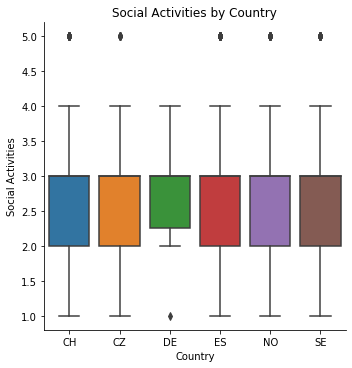

In [61]:
survey_df_14_ES = survey_df_14[survey_df_14['cntry'] == 'ES']
print('Switzerland mean: ', survey_df_14_CH['sclact'].mean())
print('Czech Republic mean: ', survey_df_14_CZ['sclact'].mean())
print('Germany mean: ', survey_df_14_DE['sclact'].mean())
print('Spain mean: ', survey_df_14_ES['sclact'].mean())

sns.catplot(x='cntry', y= 'sclact', kind='box', data= survey_df_14)
plt.xlabel('Country')
plt.ylabel('Social Activities')
plt.title('Social Activities by Country')
plt.show()

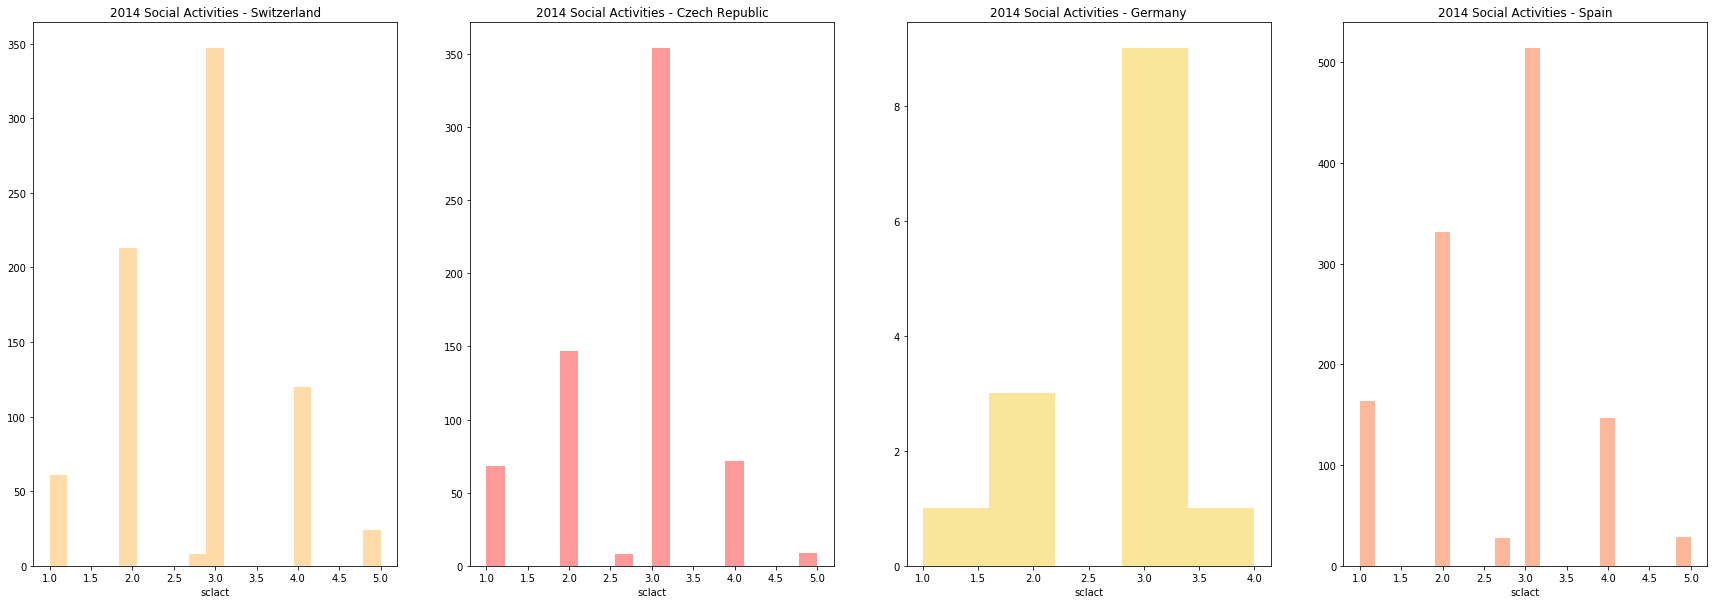

In [62]:
#distribution of happiness by year
plt.figure(figsize=(30,10))
plt.subplot(1, 4, 1)
sns.distplot(survey_df_14_CH['sclact'], kde = False, color = '#ffa62b')
plt.title('2014 Social Activities - Switzerland')
plt.subplot(1, 4, 2)
sns.distplot(survey_df_14_CZ['sclact'], kde = False, color = '#fe0002')
plt.title('2014 Social Activities - Czech Republic')
plt.subplot(1, 4, 3)
sns.distplot(survey_df_14_DE['sclact'], kde = False, color = '#f5bf03')
plt.title('2014 Social Activities - Germany')
plt.subplot(1, 4, 4)
sns.distplot(survey_df_14_ES['sclact'], kde = False, color = '#fe4b03')
plt.title('2014 Social Activities - Spain')
plt.show()

Since a person cannot live in more than one country at once, these groups are independent. The groups are fairly normally distributed, with most of the data concentrated towards the mean and less data on either end. Since we have more than two groups, we will start with a one-way ANOVA and then compare the groups pairwise using t-tests.

In [63]:
stats.f_oneway(survey_df_14_CH['sclact'], survey_df_14_CZ['sclact'], survey_df_14_DE['sclact'], survey_df_14_ES['sclact'])

F_onewayResult(statistic=5.062044017308539, pvalue=0.0016962772272038663)

In [64]:
print(stats.ttest_ind(survey_df_14_CH['sclact'], survey_df_14_CZ['sclact']))
print(stats.ttest_ind(survey_df_14_CH['sclact'], survey_df_14_DE['sclact']))
print(stats.ttest_ind(survey_df_14_CH['sclact'], survey_df_14_ES['sclact']))

Ttest_indResult(statistic=1.6654627801911122, pvalue=0.09603965267664333)
Ttest_indResult(statistic=0.27473605754923935, pvalue=0.783591314562264)
Ttest_indResult(statistic=3.7749105195874604, pvalue=0.00016476909025929954)


In [65]:
print(stats.ttest_ind(survey_df_14_CZ['sclact'], survey_df_14_DE['sclact']))
print(stats.ttest_ind(survey_df_14_CZ['sclact'], survey_df_14_ES['sclact']))

Ttest_indResult(statistic=-0.04675895844664183, pvalue=0.9627192732205789)
Ttest_indResult(statistic=1.9008180262458867, pvalue=0.05747955752757104)


In [66]:
print(stats.ttest_ind(survey_df_14_DE['sclact'], survey_df_14_ES['sclact']))

Ttest_indResult(statistic=0.3732781905877244, pvalue=0.7090059903476165)
